# 準備

In [ ]:
!pip install -q japanize_matplotlib

In [ ]:
# 環境の準備 : 実行してください
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import japanize_matplotlib
from scipy import stats
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
plt.style.use('bmh')

plt.rcParams['figure.figsize'] = 10, 8

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AI・データサイエンス実践プログラム/中間テスト/exercise.csv')
df

,recency,history,used_discount,used_bogo,zip_code,is_referral,channel,offer,conversion
0,10,142.44,1,0,Surburban,0,Phone,Buy One Get One,0
1,6,329.08,1,1,Rural,1,Web,No Offer,0
2,7,180.65,0,1,Surburban,1,Web,Buy One Get One,0
3,9,675.83,1,0,Rural,1,Web,Discount,0
4,2,45.34,1,0,Urban,0,Web,Buy One Get One,0
...,...,...,...,...,...,...,...,...,...
63995,10,105.54,1,0,Urban,0,Web,Discount,0
63996,5,38.91,0,1,Urban,1,Phone,Discount,0
63997,6,29.99,1,0,Urban,1,Phone,Discount,0
63998,1,552.94,1,0,Surburban,1,Multichannel,Buy One Get One,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64000 entries, 0 to 63999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   recency        64000 non-null  int64  
 1   history        64000 non-null  float64
 2   used_discount  64000 non-null  int64  
 3   used_bogo      64000 non-null  int64  
 4   zip_code       64000 non-null  object 
 5   is_referral    64000 non-null  int64  
 6   channel        64000 non-null  object 
 7   offer          64000 non-null  object 
 8   conversion     64000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 4.4+ MB


In [ ]:
df.describe()

,recency,history,used_discount,used_bogo,is_referral,conversion
count,64000.000000,64000.000000,64000.000000,64000.000000,64000.000000,64000.000000
mean,5.763734,242.085656,0.551031,0.549719,0.502250,0.146781
std,3.507592,256.158608,0.497393,0.497526,0.499999,0.353890
min,1.000000,29.990000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,64.660000,0.000000,0.000000,0.000000,0.000000
50%,6.000000,158.110000,1.000000,1.000000,1.000000,0.000000
75%,9.000000,325.657500,1.000000,1.000000,1.000000,0.000000
max,12.000000,3345.930000,1.000000,1.000000,1.000000,1.000000


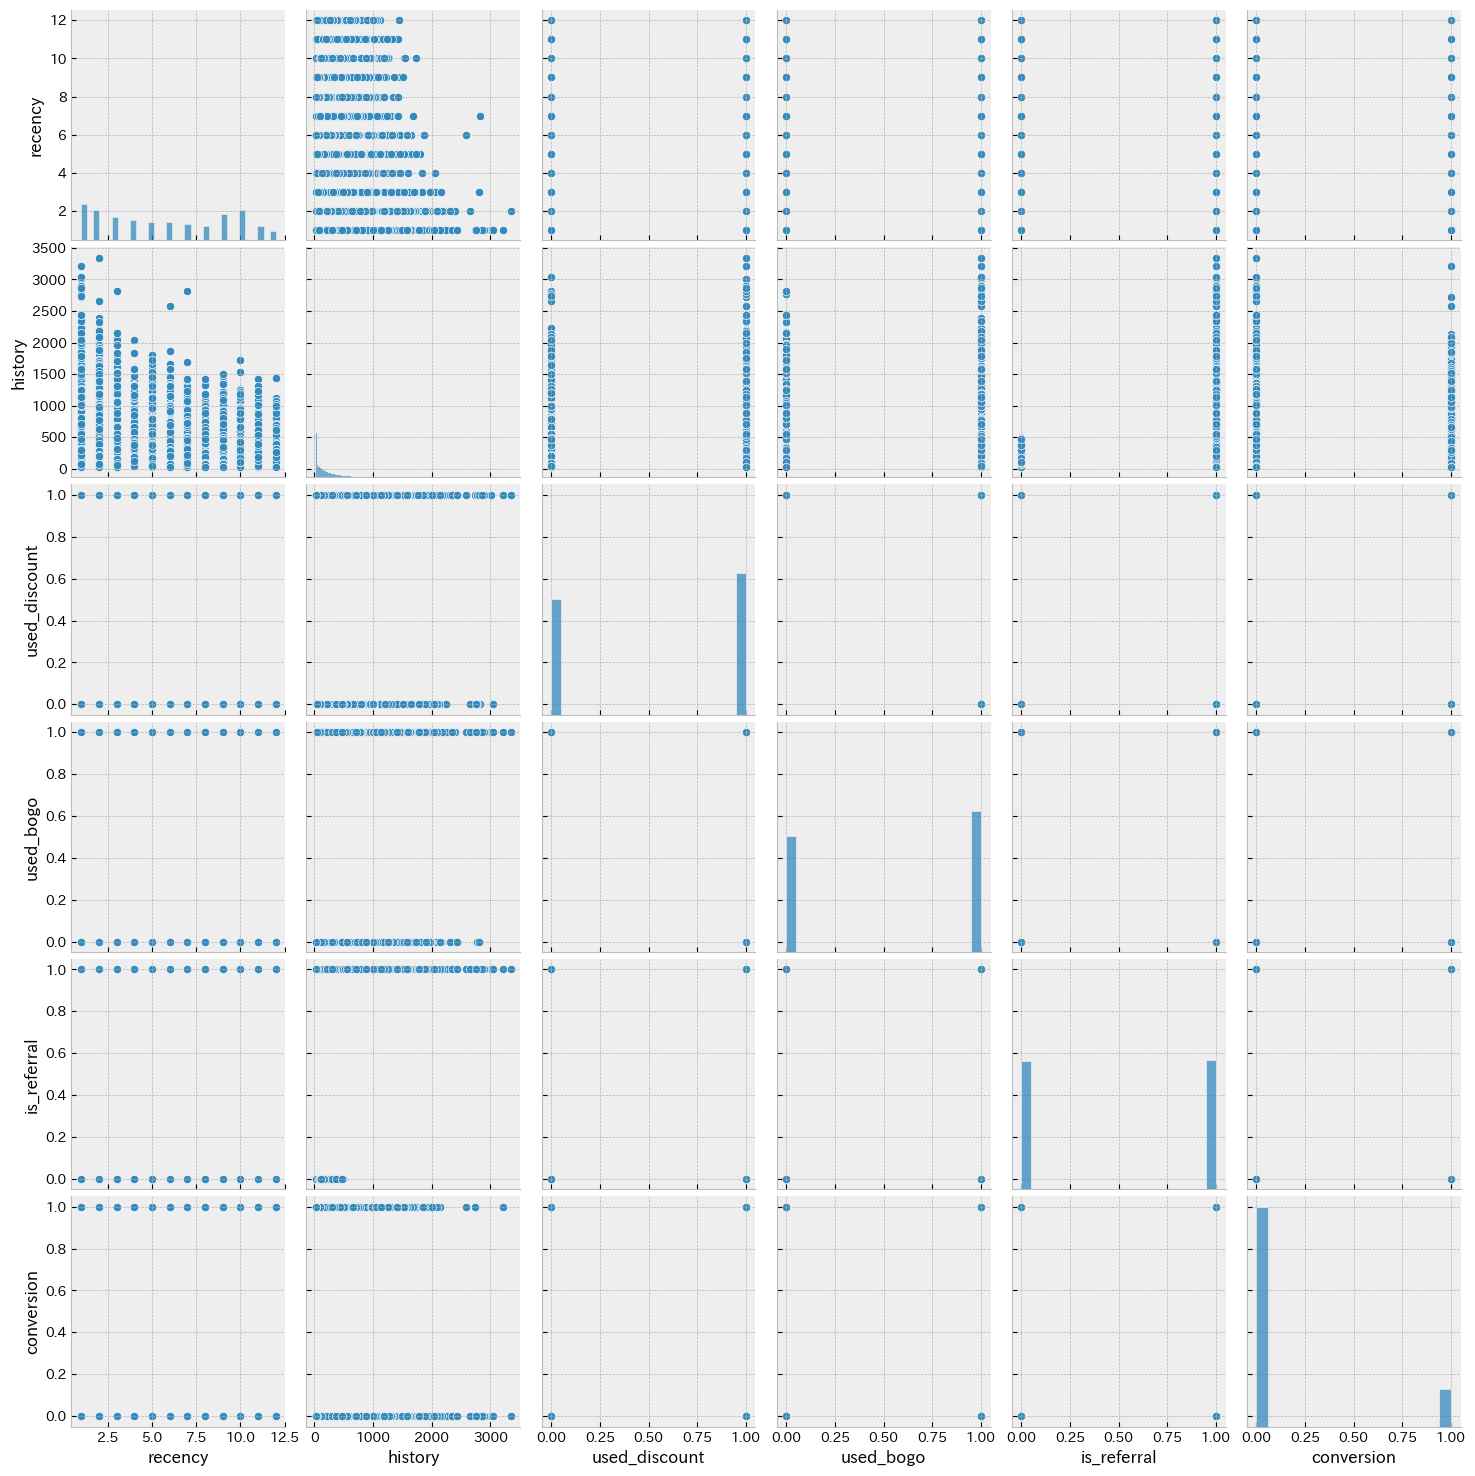

In [ ]:
sns.pairplot(df);

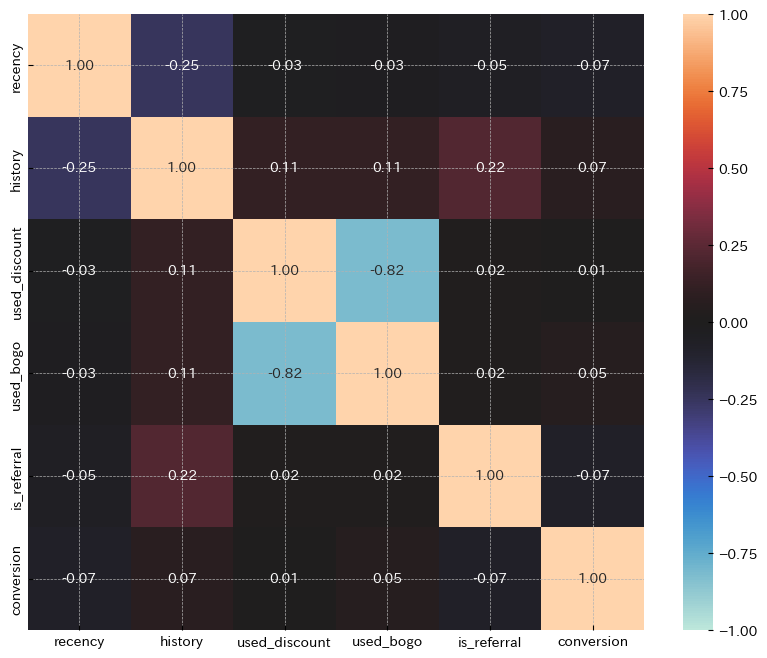

In [ ]:
# データフレームdfから数値型の列のみを選択
numeric_df = df.select_dtypes(include=['number'])

# 数値型の列のみを含むデータフレームの相関行列の計算
corr = numeric_df.corr()

# 相関行列のヒートマップの描画
sns.heatmap(corr, annot=True, square=True, vmax=1, vmin=-1, center=0, fmt='.2f');

In [ ]:
_df = pd.get_dummies(df, drop_first = True)
_df.head()

,recency,history,used_discount,used_bogo,is_referral,conversion,zip_code_Surburban,zip_code_Urban,channel_Phone,channel_Web,offer_Discount,offer_No Offer
0,10,142.44,1,0,0,0,True,False,True,False,False,False
1,6,329.08,1,1,1,0,False,False,False,True,False,True
2,7,180.65,0,1,1,0,True,False,False,True,False,False
3,9,675.83,1,0,1,0,False,False,False,True,True,False
4,2,45.34,1,0,0,0,False,True,False,True,False,False


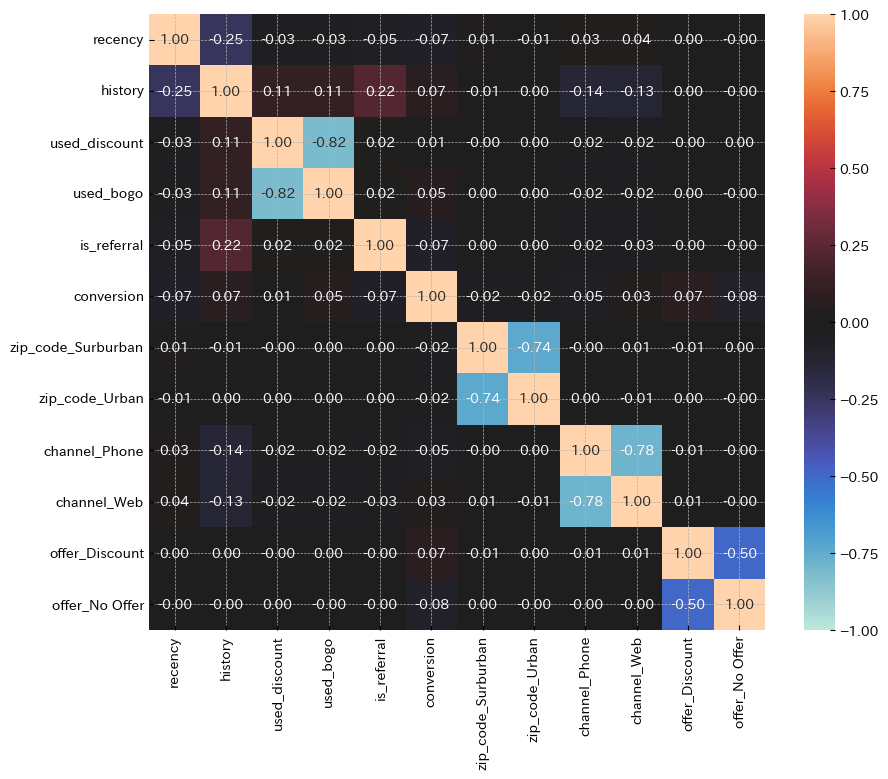

In [ ]:
sns.heatmap(_df.corr(), annot = True, square = True, vmax = 1, vmin = -1, center = 0, fmt = '.2f');

# offer = Discount のデータ

In [ ]:
df_dis = df[df['offer'] == 'Discount']
gi0 = df_dis[df_dis['conversion'] == 0]
gi1 = df_dis[df_dis['conversion'] == 1]

# 数値変数の検定
-  正規性の確認
- 検定

In [ ]:
# 正規性の確認
stats.shapiro(gi0['used_discount']) # 0.05より小さい　-> 正規分布ではない

ShapiroResult(statistic=0.6341589093208313, pvalue=0.0)

In [ ]:
# マンホイットニーのu検定
stats.mannwhitneyu(gi0['used_discount'], gi1['used_discount'], alternative = 'two-sided') # p < 0.05 つまり平均値に差がある

MannwhitneyuResult(statistic=32234587.0, pvalue=2.3842754651643667e-08)

In [ ]:
# 正規性の確認
stats.shapiro(gi0['used_bogo']) # 0.05より小さい　-> 正規分布ではない

ShapiroResult(statistic=0.6339287757873535, pvalue=0.0)

In [ ]:
# マンホイットニーのu検定
stats.mannwhitneyu(gi0['used_bogo'], gi1['used_bogo'], alternative = 'two-sided') # p < 0.05 つまり平均値に差がある

MannwhitneyuResult(statistic=32499087.5, pvalue=2.6378862598653704e-06)

In [ ]:
# 正規性の確認
stats.shapiro(gi0['is_referral']) # 0.05より小さい　-> 正規分布ではない

ShapiroResult(statistic=0.6361594796180725, pvalue=0.0)

In [ ]:
# マンホイットニーのu検定
stats.mannwhitneyu(gi0['is_referral'], gi1['is_referral'], alternative = 'two-sided') # p < 0.05 つまり平均値に差がある

MannwhitneyuResult(statistic=37162438.5, pvalue=2.075367379721103e-27)

In [ ]:
# 正規性の確認
stats.shapiro(gi0['recency']) # 0.05より小さい　-> 正規分布ではない

ShapiroResult(statistic=0.9193612337112427, pvalue=0.0)

In [ ]:
# マンホイットニーのu検定
stats.mannwhitneyu(gi0['recency'], gi1['recency'], alternative = 'two-sided') # p < 0.05 つまり平均値に差がある

MannwhitneyuResult(statistic=37966381.5, pvalue=5.727925519776182e-32)

In [ ]:
# 正規性の確認
stats.shapiro(gi0['history']) # 0.05より小さい　-> 正規分布ではない

ShapiroResult(statistic=0.7497648000717163, pvalue=0.0)

In [ ]:
# マンホイットニーのu検定
stats.mannwhitneyu(gi0['history'], gi1['history'], alternative = 'two-sided') # p < 0.05 つまり平均値に差がある

MannwhitneyuResult(statistic=29959566.5, pvalue=5.54042169361182e-30)

# カテゴリカル変数の検定
- x二乗検定

In [ ]:
# x二乗検定

from scipy import stats

p_dict = {}

df_dis_numeric = df_dis.select_dtypes(include='number')

for c in df_dis_numeric.columns:
  if c != 'conversion':
    crosstab = pd.crosstab(df[c], df['conversion'])
    chi2, p, dof, ef = stats.chi2_contingency(crosstab, correction = False)
    if p <= 0.05 :
      p_dict[c] = p
sorted_p_dict = dict(sorted(p_dict.items(), key=lambda item: item[1], reverse=True))
display(sorted_p_dict)
# p > 0.05　関連がない

{'history': 6.69972426324914e-23,
 'used_bogo': 1.595298975970467e-39,
 'is_referral': 4.817988877193599e-78,
 'recency': 1.2098080358777079e-78}

# x二乗検定　試し

In [ ]:
# offer
crosstab = pd.crosstab(df['offer'], df['conversion'])
chi2, p, dof, ef = stats.chi2_contingency(crosstab, correction = False)
p

2.869178384267155e-110

In [ ]:
# zip code
crosstab = pd.crosstab(df['zip_code'], df['conversion'])
chi2, p, dof, ef = stats.chi2_contingency(crosstab, correction = False)
p

4.636935563366961e-34

In [ ]:
# channel
crosstab = pd.crosstab(df['channel'], df['conversion'])
chi2, p, dof, ef = stats.chi2_contingency(crosstab, correction = False)
p

1.2736921440078863e-35

# 回帰　試し

In [ ]:
# カテゴリカル変数をダミー変数に変換
df_with_dummies = pd.get_dummies(df, drop_first=True)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [ ]:
x = df_with_dummies.drop('conversion', axis = 1)
y = df_with_dummies['conversion']

x_scaled = scaler.fit_transform(x)
feature = pd.DataFrame(x_scaled, columns=df_with_dummies.drop('conversion', axis=1).columns)

np.random.seed(0)
multi_ols = sm.OLS(y, sm.add_constant(feature))
result = multi_ols.fit()

In [ ]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             conversion   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     207.7
Date:                Sat, 06 Apr 2024   Prob (F-statistic):               0.00
Time:                        16:25:59   Log-Likelihood:                -23208.
No. Observations:               64000   AIC:                         4.644e+04
Df Residuals:                   63988   BIC:                         4.655e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1468      0.001    106.775      0.000       0.144       0.149
recency               -0.0220      0.001    -15.540      0.000      -0.025      -0.019
history                0.0145      0.002      8.706      0.000       0.011       0.018
used_discount          0.0442      0.003     17.268      0.000       0.039       0.049
used_bogo              0.0530      0.003     20.703      0.000       0.048       0.058
is_referral           -0.0323      0.001    -22.860      0.000      -0.035      -0.029
zip_code_Surburban    -0.0232      0.002    -11.367      0.000      -0.027      -0.019
zip_code_Urban        -0.0238      0.002    -11.637      0.000      -0.028      -0.020
channel_Phone         -0.0045      0.002     -1.852      0.064      -0.009       0.000
channel_Web            0.0111      0.002      4.604      0.000       0.006       0.016
offer_Discount         0.0144      0.002      9.070      0.000       0.011       0.017
offer_No Offer        -0.0214      0.002    -13.511      0.000      -0.025      -0.018
==============================================================================
Omnibus:                    20397.703   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            47287.860
Skew:                           1.892   Prob(JB):                         0.00
Kurtosis:                       4.849   Cond. No.                         3.46
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# 自由度調整済み決定係数
result.rsquared_adj

0.0343010385639867

In [ ]:
result.tvalues[0:]

const                 106.775302
recency               -15.539503
history                 8.706340
used_discount          17.267692
used_bogo              20.703281
is_referral           -22.860347
zip_code_Surburban    -11.366897
zip_code_Urban        -11.636820
channel_Phone          -1.852349
channel_Web             4.604110
offer_Discount          9.070215
offer_No Offer        -13.511306
dtype: float64

In [ ]:
# 説明変数とt,p値, 標準偏回帰係数のデータフレームを作成
res_values = pd.DataFrame([result.tvalues[1:], result.pvalues[1:], result.params[1:]],
                          index=['t', 'p', 'coef']).T
res_values

,t,p,coef
recency,-15.539503,2.356951e-54,-0.022044
history,8.706340,3.211528e-18,0.014495
used_discount,17.267692,1.167268e-66,0.044176
used_bogo,20.703281,6.633969e-95,0.052972
is_referral,-22.860347,3.346009e-115,-0.032253
zip_code_Surburban,-11.366897,6.530110e-30,-0.023213
zip_code_Urban,-11.636820,2.879811e-31,-0.023763
channel_Phone,-1.852349,6.398030e-02,-0.004450
channel_Web,4.604110,4.150280e-06,0.011052
offer_Discount,9.070215,1.220407e-19,0.014389


In [ ]:
# 条件抽出
# t値の絶対値が2以上かつp値が5%以下
res_values[(res_values['t'].abs()>=2.0)&(res_values['p']<0.05)].sort_values('t', ascending=False)

,t,p,coef
used_bogo,20.703281,6.633969e-95,0.052972
used_discount,17.267692,1.167268e-66,0.044176
offer_Discount,9.070215,1.220407e-19,0.014389
history,8.706340,3.211528e-18,0.014495
channel_Web,4.604110,4.150280e-06,0.011052
zip_code_Surburban,-11.366897,6.530110e-30,-0.023213
zip_code_Urban,-11.636820,2.879811e-31,-0.023763
offer_No Offer,-13.511306,1.529508e-41,-0.021434
recency,-15.539503,2.356951e-54,-0.022044
is_referral,-22.860347,3.346009e-115,-0.032253


In [ ]:
tmp = df_with_dummies.corr()['conversion']
tmp[tmp.abs()>0.5].sort_values(ascending=False)

conversion    1.0
Name: conversion, dtype: float64

# クラスタリング・PCA 試し

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [ ]:
# 数値データのみを取得
df_numeric = df.select_dtypes(include='number')
# df_numeric = df_dis.select_dtypes(include='number')

_df = df_numeric.drop(['conversion'], axis=1)
# 標準化
x_scaled = scaler.fit_transform(_df)
x_scaled[0]

array([ 0.91833539,  1.6631257 ,  0.90280724, -1.10870738,  0.996954  ])

In [ ]:
from sklearn.cluster import KMeans

# クラスラリングの実行
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(x_scaled)

# クラスタリングの結果を追加
df['cluster'] = kmeans.labels_
df.head(2)

ValueError: Length of values (21307) does not match length of index (64000)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4, random_state=0)

In [ ]:
feature = pca.fit_transform(x_scaled)
feature_df = pd.DataFrame(feature, columns=['1', '2', '3', '4'])
new_data = pd.concat([df, feature_df], axis=1)
new_data.head(2)

In [ ]:
# 寄与率
variance_ratio = pca.explained_variance_ratio_

pd.DataFrame(
    variance_ratio,
    index=[f'PC{x+1}' for x in range(len(variance_ratio))],
    columns=['寄与率']
)

In [ ]:
# 主成分負荷量
factor_loading = pca.components_ * np.c_[np.sqrt(pca.explained_variance_)]

df_factor_loading = pd.DataFrame(
    factor_loading,
    index=[f'PC{x+1}' for x in range(len(factor_loading))],
    columns=_df.columns
)
df_factor_loading.head(4)

In [ ]:
# 可視化して確認
sns.heatmap(df_factor_loading.head(4), vmax=1.0, center=0.0, vmin=-1.0, square=True, annot=True, fmt='.2f');

In [ ]:
sns.scatterplot(x='2', y='3', hue='cluster', size='conversion', data=new_data);

In [ ]:
# クラスタの数を取得
num = kmeans.n_clusters

# クラスターごとに可視化して確認
plt.figure(figsize=(18, 6))

for n in range(num):
    plt.subplot(1, 3, n+1)
    plt.title(f'cluster_{n}')
    sns.barplot(x=groups.mean().columns, y=groups.mean().loc[n])
    plt.xticks(rotation=45) # 凡例を 45 ℃ 傾けて表示
    plt.tight_layout() # 文字の頭などがないように表示

In [ ]:
# クラスタの数を取得
num = kmeans.n_clusters

# クラスターごとに可視化して確認
plt.figure(figsize=(18, 6))

for n in range(num):
    plt.subplot(1, 3, n+1)
    plt.title(f'cluster_{n}')
    sns.barplot(x=groups.mean().drop('history', axis = 1).drop('conversion', axis = 1).columns, y=groups.mean().drop('history', axis = 1).drop('conversion', axis = 1).loc[n])
    plt.xticks(rotation=45) # 凡例を 45 ℃ 傾けて表示
    plt.tight_layout() # 文字の頭などがないように表示